In [1]:
from harness import Harness
import pandas
from harness.ext import HarnessExtension

In [2]:


class NetworkXMixin:
    graph = None

class NetworkXExtension(HarnessExtension):
    imports = 'networkx'
    mixin = NetworkXMixin
    
    def keywords(self, dataframe):
        return {
            'G': lambda: dataframe.graph,
            'df': lambda: dataframe,
        }
    
    def to_graph(self, source, target, edge_attr=True, df=None):
        df.graph = self.module_.from_pandas_dataframe(
            df, source, target, edge_attr
        )
        return df.graph
    
    def callback(self, dataframe, value):
        if isinstance(value, self.module_.Graph):
            return dataframe
        return value
    
    def edges(self, df):
        return df.graph.edges()
    
    def nodes(self, df):
        return df.graph.nodes()
        

In [3]:
extensions = [
    'harness.ext.base.JinjaExtension',
    'harness.ext.SciKit.SciKitExtension', 
    'harness.ext.Bokeh.BokehModelsExtension',     
    'harness.ext.Bokeh.BokehPlottingExtension',
    'harness.ext.Bokeh.BokehChartsExtension',
    '__main__.NetworkXExtension'
]

In [4]:
df = Harness(pandas.np.random.randn(10,2), extensions=extensions)

In [5]:
df.to_graph(source=0, target=1)

,0,1
0,-0.762177,-0.485428
1,0.872217,-1.119764
2,-0.852261,-1.399184
3,0.804045,-1.257540
4,-0.498610,0.446014
5,0.040428,-0.567451
6,0.497482,0.157098
7,-0.972946,-1.196962
8,-0.654853,0.546406
9,-1.054624,-0.221407


In [6]:
df.to_graph(0, 1).edges()

[(-0.7621771992131493, -0.48542789619299875),
 (-0.85226055349707286, -1.3991839813006963),
 (-0.97294581874318187, -1.1969620188152952),
 (-0.49861022058312843, 0.44601383132499639),
 (-1.1197643389849739, 0.87221742089430154),
 (-0.5674510585362994, 0.040427564249763764),
 (0.54640600528071925, -0.65485258686268943),
 (-0.22140741011418189, -1.0546242489950457),
 (0.49748177645275737, 0.15709804882686332),
 (0.80404529557589766, -1.2575396393662954)]

In [7]:
df.edges()

[(-0.7621771992131493, -0.48542789619299875),
 (-0.85226055349707286, -1.3991839813006963),
 (-0.97294581874318187, -1.1969620188152952),
 (-0.49861022058312843, 0.44601383132499639),
 (-1.1197643389849739, 0.87221742089430154),
 (-0.5674510585362994, 0.040427564249763764),
 (0.54640600528071925, -0.65485258686268943),
 (-0.22140741011418189, -1.0546242489950457),
 (0.49748177645275737, 0.15709804882686332),
 (0.80404529557589766, -1.2575396393662954)]

In [8]:
Harness(df.spring_layout()).transpose().sample(2)

,0,1
-0.852261,0.059884,0.73743
-0.498610,0.468438,1.00000


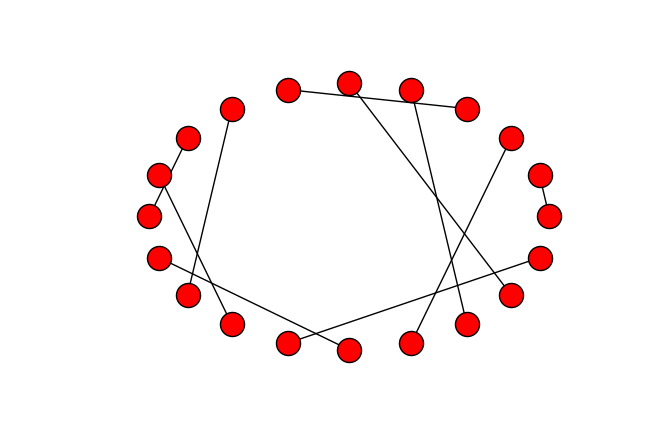

In [9]:
%matplotlib inline
df.draw_circular()